# Solving Ricochet Robot

See https://en.wikipedia.org/wiki/Ricochet_Robot for more info

In [1]:
%matplotlib inline
%load_ext autoreload

In [2]:
import ricochet
from ricochet import Direction, DIMENSION, Color

In [3]:
# Sample Board
# TODO - randomly generate this
# got idea from http://1.bp.blogspot.com/-Ythx5IaMAxY/UPrGdgymTUI/AAAAAAAAHzY/3qHS2Hp9tkw/s1600/006-Ricochet+Robot.JPG
board = ricochet.Board()
for i in range(ricochet.DIMENSION):
    board.add_wall(0, i, Direction.LEFT)
    board.add_wall(i, 0, Direction.DOWN)
    board.add_wall(DIMENSION, i, Direction.LEFT)
    board.add_wall(i, DIMENSION, Direction.DOWN)
walls = [
  (0, 5, Direction.DOWN), (0, 9, Direction.DOWN),
  (1, 12, Direction.RIGHT), (1, 12, Direction.UP), (1, 2, Direction.DOWN), (1, 2, Direction.LEFT),
  (2, 10, Direction.DOWN), (2, 10, Direction.RIGHT),
  (3, 6, Direction.DOWN), (3, 6, Direction.RIGHT),
  (4, 15, Direction.LEFT),
  (5, 0, Direction.LEFT), (5, 11, Direction.LEFT), (5, 11, Direction.UP), (5, 4, Direction.LEFT), (5, 4, Direction.UP),
  (6, 1, Direction.RIGHT), (6, 1, Direction.UP), (6, 14, Direction.DOWN), (6, 14, Direction.LEFT),
  (7, 10, Direction.DOWN), (7, 10, Direction.RIGHT), (7, 7, Direction.DOWN), (7, 7, Direction.LEFT), (7, 8, Direction.LEFT), (7, 8, Direction.UP),
  (8, 7, Direction.DOWN), (8, 7, Direction.RIGHT), (8, 8, Direction.RIGHT), (8, 8, Direction.UP),
  (9, 3, Direction.LEFT), (9, 3, Direction.UP),
  (10, 15, Direction.LEFT), (10, 8, Direction.RIGHT), (10, 8, Direction.UP),
  (11, 1, Direction.DOWN), (11, 1, Direction.RIGHT), (11, 13, Direction.DOWN), (11, 13, Direction.LEFT),
  (12, 6, Direction.RIGHT), (12, 6, Direction.UP),
  (13, 9, Direction.DOWN), (13, 9, Direction.RIGHT),
  (14, 0, Direction.LEFT), (14, 14, Direction.LEFT), (14, 14, Direction.UP), (14, 2, Direction.DOWN), (14, 2, Direction.LEFT),
  (15, 12, Direction.DOWN), (15, 6, Direction.DOWN),
]

for wall in walls:
    board.add_wall(*wall)

robots = ((0, 1), (4, 1), (7, 14), (12, 4))

In [4]:
def run_and_plot(finish, heuristic=None, neighbour=None):
    """run the board."""
    stat = ricochet.Stat()
    deltas = set()
    if neighbour is None: neighbour = lambda position : ricochet.next_moves_all(board, position)    
    finish_color, finish_position = finish
    def finish_function(position): return finish_position == position[finish_color]
    positions = ricochet.astar(robots, neighbour, finish_condition=finish_function, heuristic=heuristic, stat=stat)
    if positions is not None:
        for i in range(len(positions) - 1):
            deltas.add(ricochet.compute_delta(positions[i + 1], positions[i]))
    ricochet.print_board(board, robots, deltas, markers=[finish])
    return stat

def prefer_moving_main(color, weight=1):
    # note: weight > 1, then inadmissible
    def heuristic(new, old):
        return 0 if (ricochet.compute_delta(new, old)[0] == color) else weight
    return heuristic

def make_heuristic(coord, board):
    # TODO
    pass

# Introduction

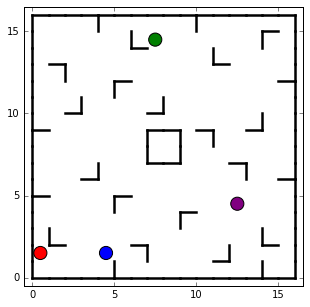

In [5]:
# starting board position
ricochet.print_board(board, robots)

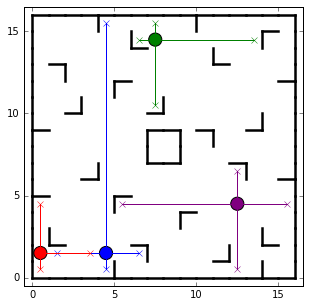

In [6]:
only_red = lambda coord: ricochet.next_moves_single(board, Color.RED.value, coord)
# all valid first move
def compute(position, deltas, depth = 1):
    if depth == 0: return
    for new_position in ricochet.next_moves_all(board, position):
        deltas.add(ricochet.compute_delta(position, new_position))
        compute(new_position, deltas, depth - 1)
deltas = set()
compute(robots, deltas)
ricochet.print_board(board, robots, paths=deltas)

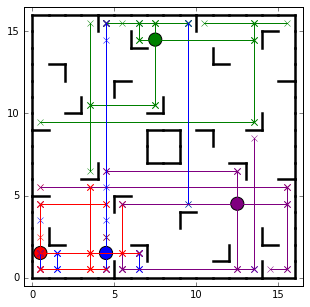

In [7]:
# all valid depth 3 moves
deltas = set()
compute(robots, deltas, depth=3)
ricochet.print_board(board, robots, paths=deltas)

# Sample Interactions

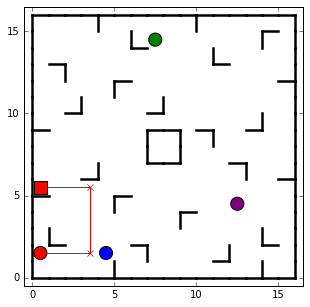

{'distance': 3, 'iteration': 1027}

In [8]:
# A simple run
run_and_plot((Color.RED.value, (0, 5)))

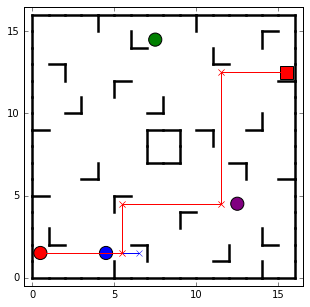

{'distance': 6, 'iteration': 51475}

In [9]:
# More complciated run - running without a heuristic function
run_and_plot((Color.RED.value, (15, 12)))

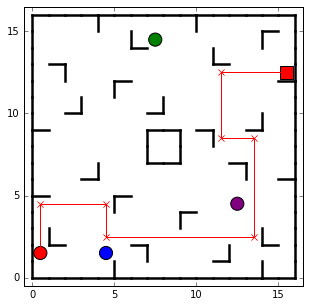

{'distance': 8, 'iteration': 55}

In [10]:
run_and_plot((Color.RED.value, (15, 12)), neighbour=only_red)

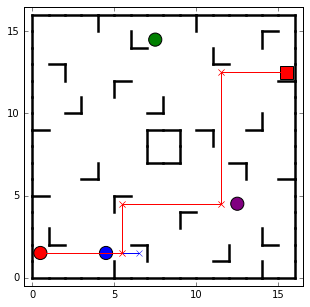

{'distance': 6, 'iteration': 25699}

In [11]:
# with heuristic - prefer moving the main robot - reduces # of moves by 1/2
run_and_plot((Color.RED.value, (15, 12)), prefer_moving_main(Color.RED.value))

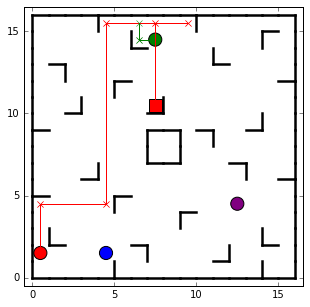

{'distance': 8, 'iteration': 166695}

In [12]:
# A complicated run
# without -> with heuristic = ?? -> 166695 iterations
run_and_plot((Color.RED.value, (7, 10)), prefer_moving_main(Color.RED.value, 1))

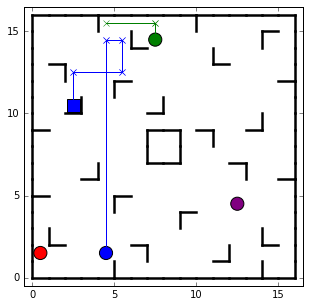

{'distance': 7, 'iteration': 54094}

In [13]:
# another example
run_and_plot((Color.BLUE.value, (2, 10)), prefer_moving_main(Color.BLUE.value))

# Inadmissible Heuristic

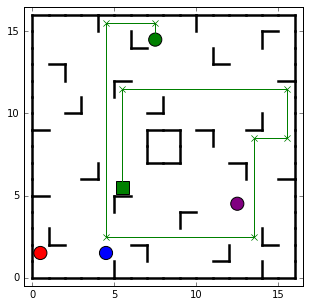

{'distance': 9, 'iteration': 327988}

In [14]:
# Simple run. requires 0.5M iterations
run_and_plot((2, (5, 5)), prefer_moving_main(2))

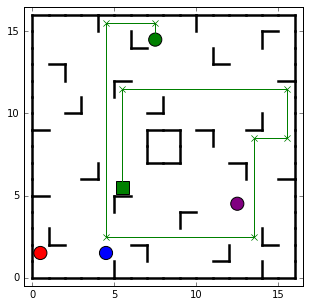

{'distance': 9, 'iteration': 189212}

In [15]:
# inadmissible heuristic but same result - only 223719 iterations
run_and_plot((2, (5, 5)), prefer_moving_main(2, 2))

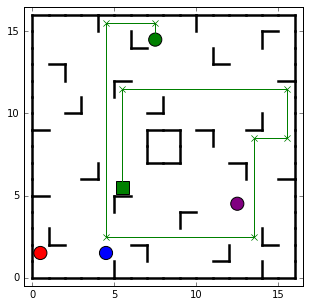

{'distance': 9, 'iteration': 25711}

In [16]:
# "very" inadmissible heuristic but fast.
# if we know that an optimal solution doesn't move other robots,
# we still achieve an optimal solution with prefer_moving_main.
# only 45829 iterations.
run_and_plot((2, (5, 5)), prefer_moving_main(2, 5))

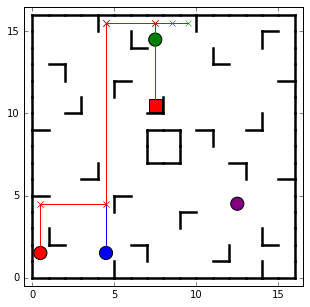

{'distance': 9, 'iteration': 45777}

In [17]:
# heavily prefer moving main.
# ? -> 53903, but recached a solution with distance 9 instead of 8.
run_and_plot((0, (7, 10)), prefer_moving_main(0, 4))

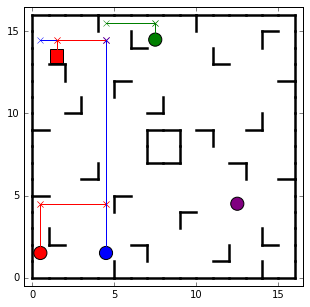

{'distance': 9, 'iteration': 343579}

In [18]:
run_and_plot((0, (1, 13)), prefer_moving_main(0))

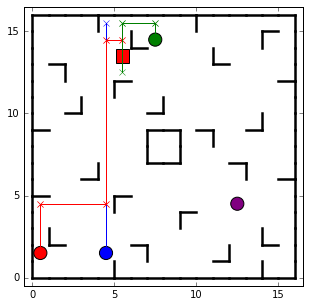

{'distance': 9, 'iteration': 377205}

In [19]:
run_and_plot((0, (5, 13)), prefer_moving_main(0))

# Backtracking Approach

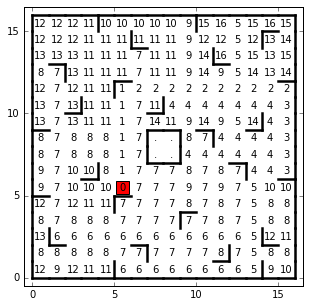

In [26]:
def single_path(source, blockers=None):
    if blockers is None:
        blockers = set()
    def single_neighbour(coord): return ricochet.prev_position(board, blockers, coord, magic_stop=False)
    history = ricochet.compute_all(source, single_neighbour)
    labels = [["."] * DIMENSION for i in range(DIMENSION)]
    for coord, record in history.items():
        x, y = coord
        labels[y][x] = record[0]
    ricochet.print_board(board, labels=labels, markers=[(0, source)] + [(1, coord) for coord in blockers])
# List of locations that can reach the final square in N steps
single_path((5, 5))

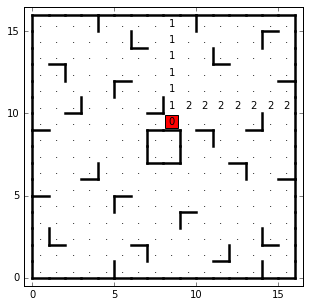

In [27]:
single_path((8, 9))

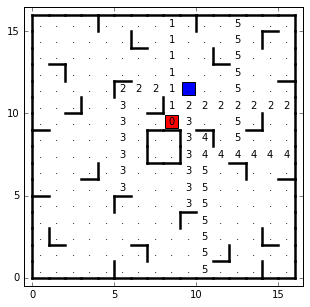

In [28]:
# list of locations that can reach (8, 9), given an obstacle at (9, 11)
single_path((8, 9), {(9, 11)})

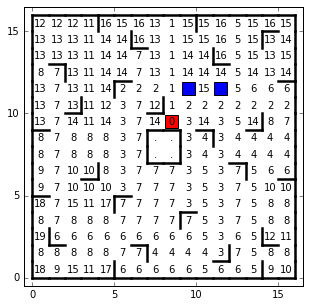

In [29]:
# additional obstacles at key locations allow pieces to move from anywhere
single_path((8, 9), {(9, 11), (11, 11)})